In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import forestplot as fp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn import tree

In [2]:
wine_data = pd.read_csv("winequality-red.csv")
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity = tartaric acid (g/dm3) \
volatile acidity = acetic acid (g/dm3) \
chlorides = soduim chloride (g/dm3) \
sulphates = potassium sulfate (g/dm3) \
citric acid (g/dm3) \
residual sugar (g/dm3) \
alcohol (% vol) \
density (g/cm3)

In [3]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine_data.drop_duplicates()
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_data_round = round(wine_data, 1)
wine_data_round

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.1,11.0,34.0,1.0,3.5,0.6,9.4,5
1,7.8,0.9,0.0,2.6,0.1,25.0,67.0,1.0,3.2,0.7,9.8,5
2,7.8,0.8,0.0,2.3,0.1,15.0,54.0,1.0,3.3,0.6,9.8,5
3,11.2,0.3,0.6,1.9,0.1,17.0,60.0,1.0,3.2,0.6,9.8,6
4,7.4,0.7,0.0,1.9,0.1,11.0,34.0,1.0,3.5,0.6,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.1,2.0,0.1,32.0,44.0,1.0,3.4,0.6,10.5,5
1595,5.9,0.6,0.1,2.2,0.1,39.0,51.0,1.0,3.5,0.8,11.2,6
1596,6.3,0.5,0.1,2.3,0.1,29.0,40.0,1.0,3.4,0.8,11.0,6
1597,5.9,0.6,0.1,2.0,0.1,32.0,44.0,1.0,3.6,0.7,10.2,5


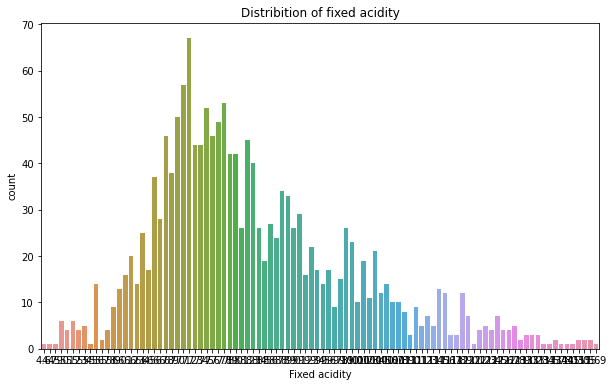

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="fixed acidity")
plt.xlabel("Fixed acidity")
plt.title("Distribition of fixed acidity")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

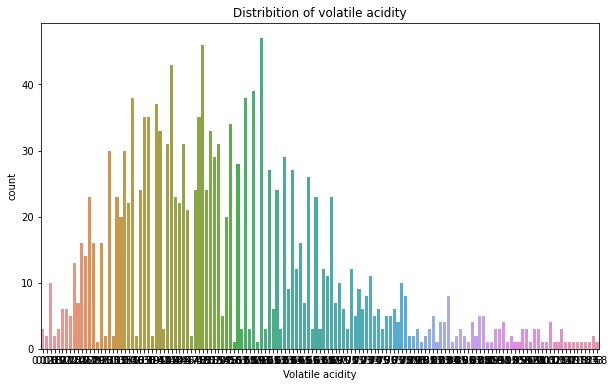

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="volatile acidity")
plt.xlabel("Volatile acidity")
plt.title("Distribition of volatile acidity")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

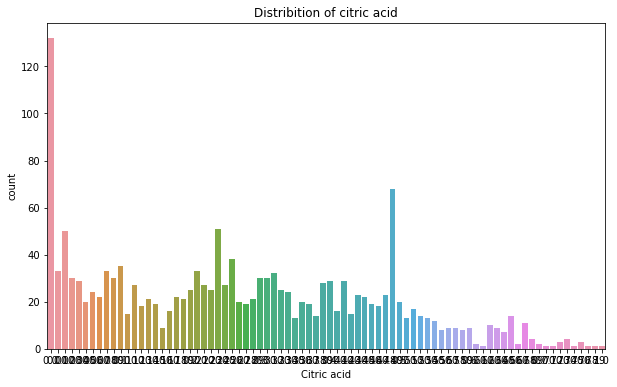

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="citric acid")
plt.xlabel("Citric acid")
plt.title("Distribition of citric acid")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

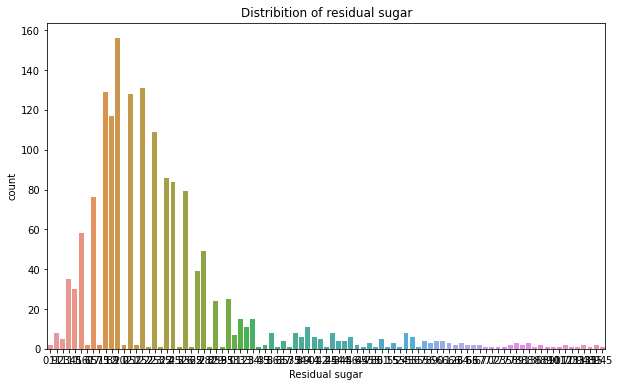

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="residual sugar")
plt.xlabel("Residual sugar")
plt.title("Distribition of residual sugar")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

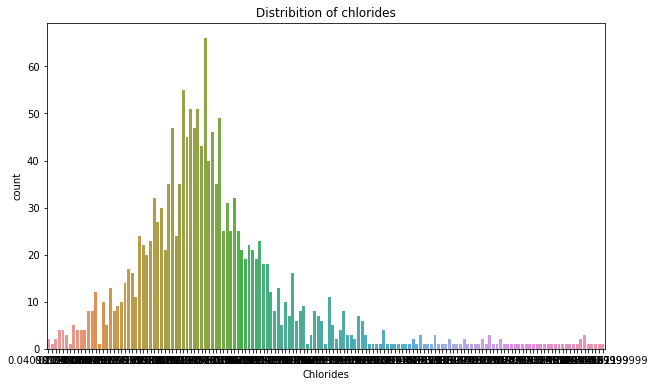

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="chlorides")
plt.xlabel("Chlorides")
plt.title("Distribition of chlorides")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

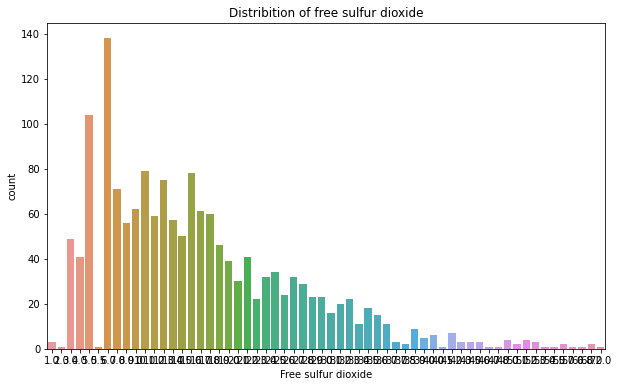

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="free sulfur dioxide")
plt.xlabel("Free sulfur dioxide")
plt.title("Distribition of free sulfur dioxide")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

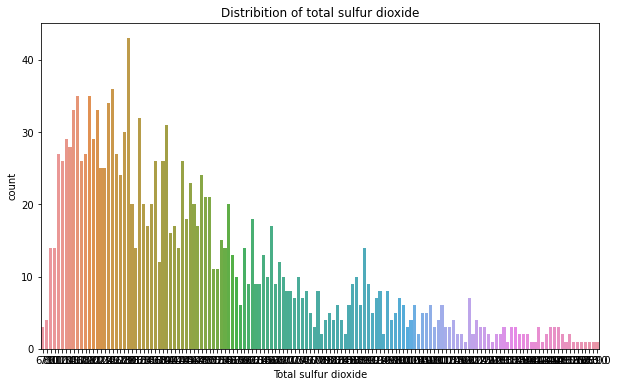

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="total sulfur dioxide")
plt.xlabel("Total sulfur dioxide")
plt.title("Distribition of total sulfur dioxide")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

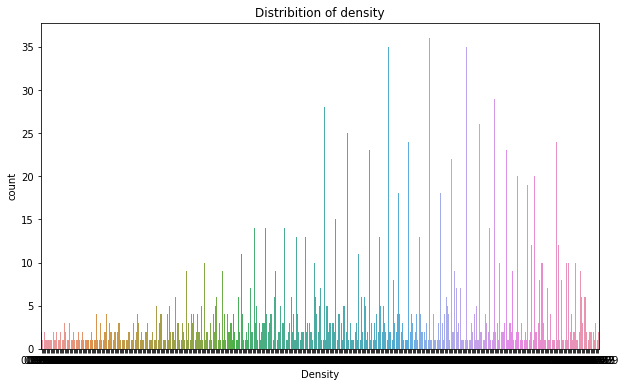

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="density")
plt.xlabel("Density")
plt.title("Distribition of density")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

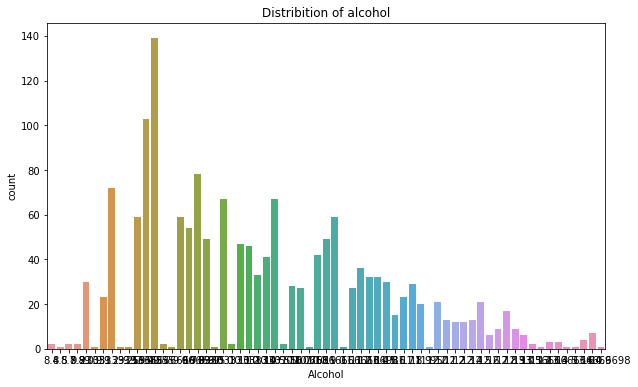

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x="alcohol")
plt.xlabel("Alcohol")
plt.title("Distribition of alcohol")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

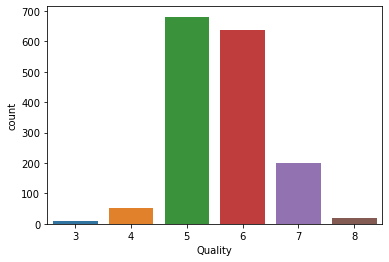

In [116]:
sns.countplot(data=wine_data, x="quality")
plt.xlabel("Quality")
#plt.title("Data distribition for the win quality score")
plt.savefig('win_ratingDistribution.jpg', bbox_inches='tight')
plt.show()

In [16]:
set(wine_data["quality"])

{3, 4, 5, 6, 7, 8}

In [17]:
quality = wine_data["quality"].value_counts()
quality

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
total = len(wine_data)
total

1599

In [19]:
quality_prop_3_4 = (10+53)/total *100
round(quality_prop_3_4, 2)

3.94

In [20]:
quality_prop_5 = 681/total *100
round(quality_prop_5, 2)

42.59

In [21]:
quality_prop_6 = 638/total *100
round(quality_prop_6, 2)

39.9

In [22]:
quality_prop_5_6 = (681+638)/total *100
round(quality_prop_5_6, 2)

82.49

In [23]:
quality_prop_7 = 199/total *100
round(quality_prop_7, 2)

12.45

In [24]:
quality_prop_8 = 18/total *100
round(quality_prop_8, 2)

1.13

In [25]:
quality_prop_7_8 = (199+18)/total *100
round(quality_prop_7_8, 2)

13.57

In [118]:
quality_mean = wine_data["quality"].mean()
quality_mean

5.6360225140712945

In [26]:
wine_stat = wine_data.describe()
wine_stat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
stat_wine= wine_stat.transpose()
round(stat_wine, 1)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.3,1.7,4.6,7.1,7.9,9.2,15.9
volatile acidity,1599.0,0.5,0.2,0.1,0.4,0.5,0.6,1.6
citric acid,1599.0,0.3,0.2,0.0,0.1,0.3,0.4,1.0
residual sugar,1599.0,2.5,1.4,0.9,1.9,2.2,2.6,15.5
chlorides,1599.0,0.1,0.0,0.0,0.1,0.1,0.1,0.6
free sulfur dioxide,1599.0,15.9,10.5,1.0,7.0,14.0,21.0,72.0
total sulfur dioxide,1599.0,46.5,32.9,6.0,22.0,38.0,62.0,289.0
density,1599.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1599.0,3.3,0.2,2.7,3.2,3.3,3.4,4.0
sulphates,1599.0,0.7,0.2,0.3,0.6,0.6,0.7,2.0


In [28]:
print(type(stat_wine))

<class 'pandas.core.frame.DataFrame'>


In [29]:
# exporte stats data in csv file
stat_wine.to_csv('redWine_stats.csv')

In [30]:
min_max_mean = stat_wine.drop(columns=["count", "std", "25%", "50%", "75%"])
min_max_mean = round(min_max_mean, 1)
min_max_mean

,mean,min,max
fixed acidity,8.3,4.6,15.9
volatile acidity,0.5,0.1,1.6
citric acid,0.3,0.0,1.0
residual sugar,2.5,0.9,15.5
chlorides,0.1,0.0,0.6
free sulfur dioxide,15.9,1.0,72.0
total sulfur dioxide,46.5,6.0,289.0
density,1.0,1.0,1.0
pH,3.3,2.7,4.0
sulphates,0.7,0.3,2.0


In [31]:
# to save dataframe as picture
import dataframe_image as dfi
#dfi.export(min_max_mean, 'redWine_minMaxMean.png')

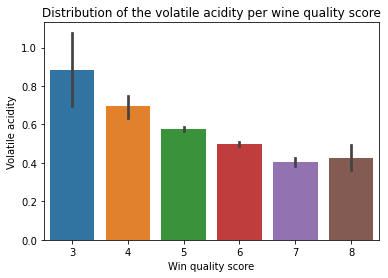

In [32]:
sns.barplot(data=wine_data, x='quality', y='volatile acidity')
plt.xlabel("Win quality score")
plt.ylabel("Volatile acidity")
plt.title("Distribution of the volatile acidity per wine quality score")
plt.show()

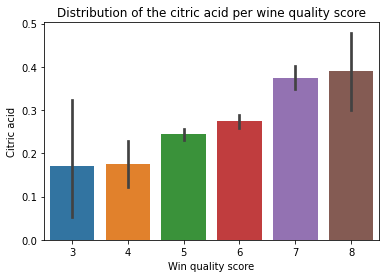

In [33]:
sns.barplot(x='quality', y='citric acid', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("Citric acid")
plt.title("Distribution of the citric acid per wine quality score")
plt.show()

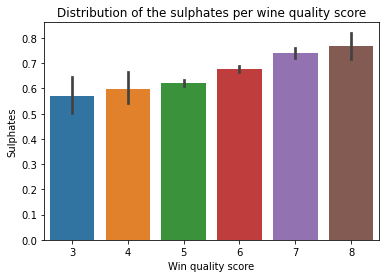

In [34]:
sns.barplot(x='quality', y='sulphates', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("Sulphates")
plt.title("Distribution of the sulphates per wine quality score")
plt.show()

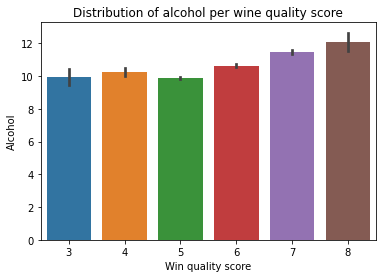

In [35]:
sns.barplot(x='quality', y='alcohol', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("Alcohol")
plt.title("Distribution of alcohol per wine quality score")
plt.show()

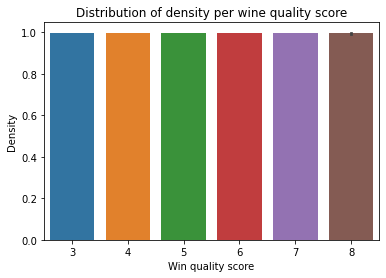

In [36]:
sns.barplot(x='quality', y='density', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("Density")
plt.title("Distribution of density per wine quality score")
plt.show()

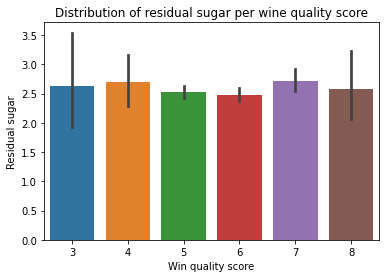

In [37]:
sns.barplot(x='quality', y='residual sugar', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("Residual sugar")
plt.title("Distribution of residual sugar per wine quality score")
plt.show()

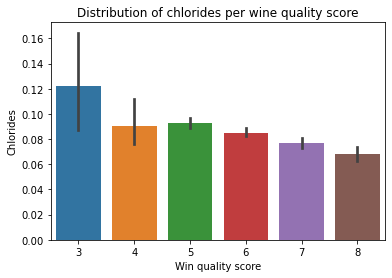

In [38]:
sns.barplot(x='quality', y='chlorides', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("Chlorides")
plt.title("Distribution of chlorides per wine quality score")
plt.show()

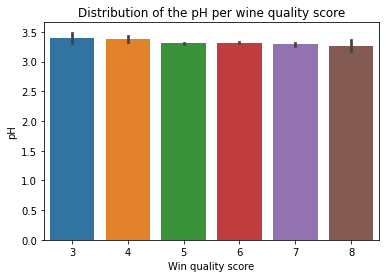

In [39]:
sns.barplot(x='quality', y='pH', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("pH")
plt.title("Distribution of the pH per wine quality score")
plt.show()

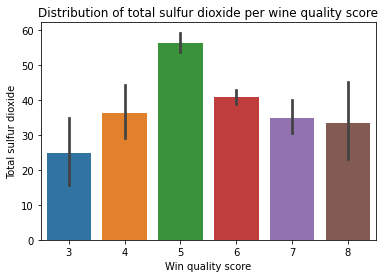

In [40]:
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_data)
plt.xlabel("Win quality score")
plt.ylabel("Total sulfur dioxide")
plt.title("Distribution of total sulfur dioxide per wine quality score")
plt.show()

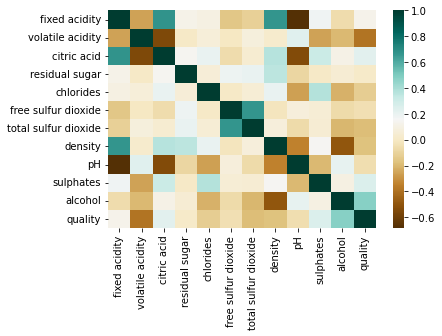

In [117]:
# search for linear correlation between variables
correlation_data = wine_data.corr()
sns.heatmap(correlation_data, cmap="BrBG")
plt.savefig('win_correlation.jpg', bbox_inches='tight')

<Axes: xlabel='quality', ylabel='alcohol'>

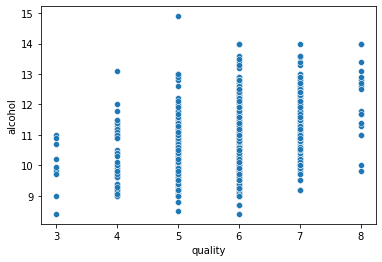

In [120]:
sns.scatterplot(data=wine_data, x="quality", y="alcohol", palette="RdBu")

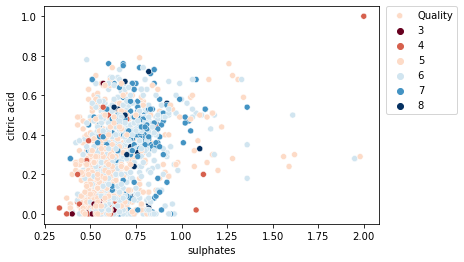

In [128]:
sns.scatterplot(data=wine_data, x="sulphates", y="citric acid", hue="quality", palette="RdBu")
plt.legend(("Quality", "3", "4", "5", "6", "7", "8"), bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('win_correlation.jpg', bbox_inches='tight')
plt.show()

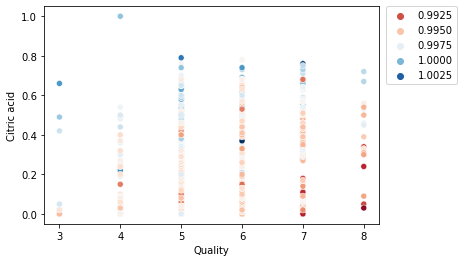

In [132]:
# fixed acidity VS citric acid per density
sns.scatterplot(data=wine_data, x="quality", y="citric acid", hue="density", palette="RdBu")
plt.xlabel("Quality")
plt.ylabel("Citric acid")
#plt.title("Fixed acidity VS Citric acid per density")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('fixedAcidityVScitricAcidPERdensity.png', bbox_inches='tight')
plt.show()

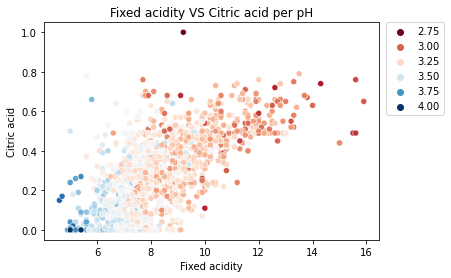

In [43]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="fixed acidity", y="citric acid", hue="pH", palette="RdBu")
plt.xlabel("Fixed acidity")
plt.ylabel("Citric acid")
plt.title("Fixed acidity VS Citric acid per pH")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('iris_petalPERspecies.png')
plt.show()

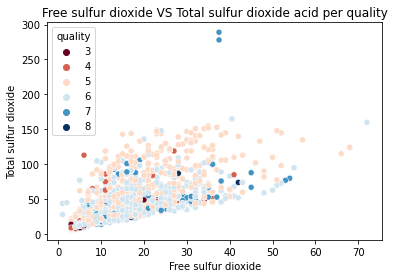

In [44]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="free sulfur dioxide", y="total sulfur dioxide", hue="quality", palette="RdBu")
plt.xlabel("Free sulfur dioxide")
plt.ylabel("Total sulfur dioxide")
plt.title("Free sulfur dioxide VS Total sulfur dioxide acid per quality")
#plt.savefig('iris_petalPERspecies.png')
plt.show()

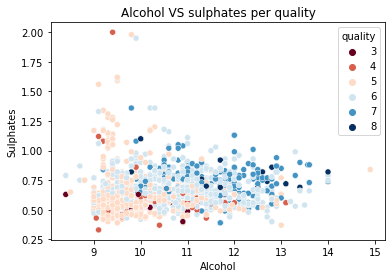

In [45]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="alcohol", y="sulphates", hue="quality", palette="RdBu")
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.title("Alcohol VS sulphates per quality")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('iris_petalPERspecies.png')
plt.show()

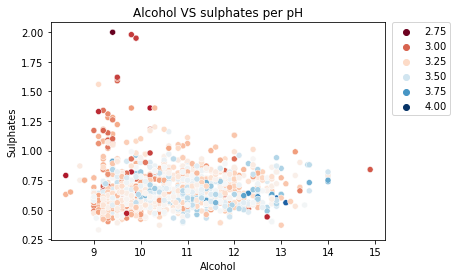

In [46]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="alcohol", y="sulphates", hue="pH", palette="RdBu")
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.title("Alcohol VS sulphates per pH")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('iris_petalPERspecies.png')
plt.show()

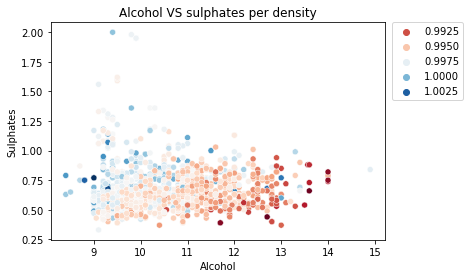

In [47]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="alcohol", y="sulphates", hue="density", palette="RdBu")
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.title("Alcohol VS sulphates per density")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('iris_petalPERspecies.png')
plt.show()

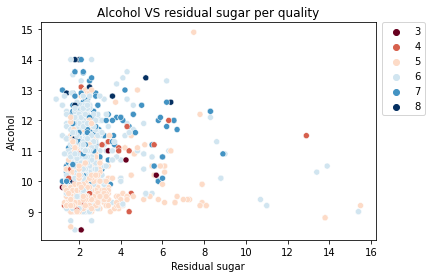

In [48]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="residual sugar", y="alcohol", hue="quality", palette="RdBu")
plt.xlabel("Residual sugar")
plt.ylabel("Alcohol")
plt.title("Alcohol VS residual sugar per quality")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('iris_petalPERspecies.png')
plt.show()

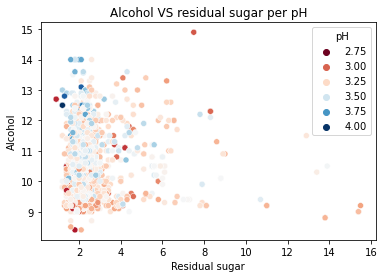

In [49]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="residual sugar", y="alcohol", hue="pH", palette="RdBu")
plt.xlabel("Residual sugar")
plt.ylabel("Alcohol")
plt.title("Alcohol VS residual sugar per pH")
#plt.savefig('iris_petalPERspecies.png')
plt.show()

In [50]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


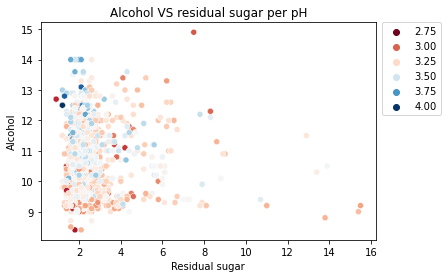

In [51]:
# petal_area VS petal_width per species
sns.scatterplot(data=wine_data, x="residual sugar", y="alcohol", hue="pH", palette="RdBu")
plt.xlabel("Residual sugar")
plt.ylabel("Alcohol")
plt.title("Alcohol VS residual sugar per pH")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('iris_petalPERspecies.png')
plt.show()

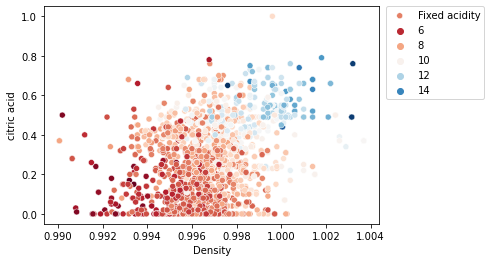

In [144]:
sns.scatterplot(data=wine_data, x="density", y="citric acid", hue="fixed acidity", palette="RdBu")
plt.xlabel("Density")
plt.ylabel("citric acid")
#plt.title("Density VS citric acid per fixed acidity")
plt.legend(("Fixed acidity", "6", "8", "10", "12", "14"), bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('wine_fixedAcidity.jpg', bbox_inches='tight')
plt.show()

In [52]:
#sns.pairplot(wine_data, hue='quality')
#plt.show()

# linear regression 

In [53]:
# regression linear
stat1 = ols("density ~ fixed acidity + residual sugar", data = wine_data).fit()
print(stat1.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
odds = pd.DataFrame(np.exp(stat1.params), columns = ["OR"])
odds["p-value"] = stat1.pvalues
odds[["2.5%", "97.5%"]] = np.exp(stat1.conf_int())
odds

In [ ]:
odds["label"] = ["sepal_area_sqrt", "sepal_length", "sepal_width", "sepal_area", "sepal_aspect_ratio", \
                 "sepal_petal_length_diff", "sepal_petal_width_diff"]
odds

In [ ]:
fp.forestplot(odds, estimate="OR", ll="2.5%", hl="97.5%", pval="p-value", varlabel="label", logscale = True, \
             # ylabel="Examen.bin: OR (97.5% CI, p-value)", xlabel="Odds-ratios (97.5% CI, log scale)")
plt.savefig("iris_forestplot.png")
plt.show()

# outliers ?

In [54]:
# Detection of outliers using z-score
z = np.abs(stats.zscore(wine_data))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


Le Z-score, également connu sous le nom de score standard, est une mesure statistique qui décrit la position d’une valeur donnée par rapport à la moyenne d’un groupe de valeurs. Plus précisément, un Z-score indique combien d’écarts-types une valeur donnée est au-dessus ou en dessous de la moyenne. \
Les Z-scores sont également utiles pour identifier les valeurs aberrantes dans un ensemble de données. Typiquement, une valeur est considérée comme une aberration si son Z-score est supérieur à +3 ou inférieur à -3. Autrement dit, si la valeur absolue de ce score est supérieure à 3. \
Un z-score vous indique où se situe le score sur un coude de dispersion typique. Un z-score de zéro vous révèle que les qualités sont en fait normales, tandis qu’un score de +3 vous révèle que la valeur est beaucoup plus élevée que la normale.

In [55]:
# Remove those records whose z>3 (outlier)
new_data = wine_data[(z < 3).all(axis = 1)]
new_data.shape

(1451, 12)

In [56]:
# proportion of none outlier
prop_non_outlier = 1451/1599 * 100
prop_non_outlier

90.74421513445904

10% of the data are outliers

In [57]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1451 non-null   float64
 1   volatile acidity      1451 non-null   float64
 2   citric acid           1451 non-null   float64
 3   residual sugar        1451 non-null   float64
 4   chlorides             1451 non-null   float64
 5   free sulfur dioxide   1451 non-null   float64
 6   total sulfur dioxide  1451 non-null   float64
 7   density               1451 non-null   float64
 8   pH                    1451 non-null   float64
 9   sulphates             1451 non-null   float64
 10  alcohol               1451 non-null   float64
 11  quality               1451 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 147.4 KB


In [58]:
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# random forest classifier _ model 1

In [59]:
# machine learning to predict the quality score
# X = input feature
x = new_data.drop(columns = "quality")
# y = outcome
y = new_data['quality']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [61]:
# use of the random forest classifier
rf_classificationModel = RandomForestClassifier(n_estimators = 100)

In [62]:
rf_classificationModel.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = rf_classificationModel.predict(x_test)

In [64]:
print('Accuracy Score', metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.7147766323024055


[Text(0.6019906113685932, 0.9722222222222222, 'x[10] <= 10.55\ngini = 0.624\nsamples = 745\nvalue = [27, 501, 486, 134, 12]'),
 Text(0.3746975531624864, 0.9166666666666666, 'x[6] <= 92.5\ngini = 0.528\nsamples = 458\nvalue = [17, 422, 262, 22, 1]'),
 Text(0.16051833424209377, 0.8611111111111112, 'x[1] <= 0.315\ngini = 0.546\nsamples = 404\nvalue = [17, 347, 257, 20, 1]'),
 Text(0.021810250817884406, 0.8055555555555556, 'x[7] <= 1.0\ngini = 0.319\nsamples = 27\nvalue = [0, 5, 35, 3, 0]'),
 Text(0.017448200654307525, 0.75, 'x[0] <= 8.4\ngini = 0.261\nsamples = 26\nvalue = [0, 3, 35, 3, 0]'),
 Text(0.013086150490730643, 0.6944444444444444, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 14, 0, 0]'),
 Text(0.021810250817884406, 0.6944444444444444, 'x[8] <= 3.43\ngini = 0.37\nsamples = 17\nvalue = [0, 3, 21, 3, 0]'),
 Text(0.017448200654307525, 0.6388888888888888, 'x[10] <= 10.35\ngini = 0.278\nsamples = 16\nvalue = [0, 3, 21, 1, 0]'),
 Text(0.013086150490730643, 0.5833333333333334, 'x[6] <= 17.5\

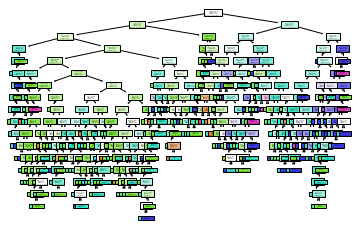

In [65]:
tree.plot_tree(rf_classificationModel.estimators_[0], filled = True)

In [66]:
print(type(y_pred))
print(y_pred.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
(291,)
(1451,)
(1160, 11)
(1160,)


# for the report

In [147]:
# machine learning to predict the quality score
# X = input feature
x = wine_data.drop(columns = "quality")
# y = outcome
y = wine_data['quality']

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [149]:
# use of the random forest classifier
rf_classificationModel = RandomForestClassifier(n_estimators = 100)

In [150]:
rf_classificationModel.fit(x_train, y_train)

RandomForestClassifier()

In [151]:
y_pred = rf_classificationModel.predict(x_test)

In [152]:
print('Accuracy Score', metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.671875


#  random forest classifier _ model 2

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of \
the dataset and uses averaging to improve the predictive accuracy and control over-fitting. \
The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), \
otherwise the whole dataset is used to build each tree.

In [67]:
# machine learning to predict the quality score
# X = input feature
x = new_data.drop(columns = "quality")
# y = outcome
y = new_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [69]:
print(y.shape, y_train.shape, y_test.shape)

(1451,) (1160,) (291,)


In [70]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

accuracy_rf = test_data_accuracy*100
print('Accuracy = ', accuracy_rf)

Accuracy =  91.75257731958763


In [72]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


# random forest classifier _ model 3

In [73]:
X = wine_data.drop(columns = "quality")
y = wine_data['quality']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 18)

In [75]:
#The parameter values I chose were n_estimators = 500, meaning 500 trees were run for this model; \
# max_depth = 4 so the maximum possible depth of each tree was set to 4; max_features = 3 \
# so only a maximum of 3 features were selected in each tree; bootstrap = True again, \
# this was the default setting but I wanted to include it to reiterate how bootstrapping applies to random forest models; \
# and, finally a random_state = 18.

clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18)\
.fit(x_train, y_train)

n_estimators — the number of decision trees you will be running in the model \
max_depth — this sets the maximum possible depth of each tree\
max_features — the maximum number of features the model will consider when determining a split\
bootstrapping — the default value for this is True, meaning the model follows bootstrapping principles (defined earlier).\
max_samples — This parameter assumes bootstrapping is set to True, if not, this parameter doesn’t apply. \
In the case of True, this value sets the largest size of each sample for each tree.\
Other important parameters are criterion, min_samples_split, min_samples_leaf, class_weights, n_jobs, and \
others that can be read in the sklearn’s RandomForestClassifier documentation here.

In [76]:
# Create our predictions
prediction = clf.predict(x_test)

In [77]:
# Create confusion matrix
confusion_matrix(y_test, prediction)

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,   8,   6,   0,   0],
       [  0,   0, 118,  41,   0,   0],
       [  0,   0,  55, 110,   0,   0],
       [  0,   0,   5,  42,  10,   0],
       [  0,   0,   0,   2,   0,   0]], dtype=int64)

In [78]:
# Display accuracy score
accuracy_score(y_test, prediction)

0.595

Accuracy is measured as the total number of (TP + TN)/(All Cases)

In [79]:
# Display F1 score
#f1_score(y_test,prediction)

# Random Forest Regression

In [80]:
X = wine_data.drop(columns = "quality")
y = wine_data['quality']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 18)

In [82]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(x_train, y_train)

In [83]:
prediction = rf.predict(x_test)

In [84]:
accuracy_score(y_test, prediction)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

we will look to find a better performing choice of parameters and will do this utilizing the GridSearchCV sklearn method.

In [ ]:
## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

## Grid Search function
CV_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)

In [ ]:
CV_rf.fit(x_train, y_train)

In [ ]:
prediction = CV_rf.predict(x_test)

In [ ]:
accuracy_score(y_test, prediction)

In [ ]:
mse = mean_squared_error(y_test, prediction)
mse

In [ ]:
mse_squared = mse**.5
mse_squared

# KNN algo

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, \
which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [85]:
X = new_data.drop('quality', axis=1)
Y = new_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [86]:
# modeling
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [87]:
modell = KNeighborsClassifier(n_neighbors = 30)
modell.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=30)

In [88]:
prediction = modell.predict(X_test)

accuracy2 = accuracy_score(Y_test,prediction)
accuracy_knn = accuracy2*100
print("Accuracy = ",accuracy_knn)

Accuracy =  85.56701030927834


In [89]:
input_data = (7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


# Hierarchical dendrogram

In [90]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [91]:
x = new_data.drop('quality',axis=1).values
y = new_data['quality']

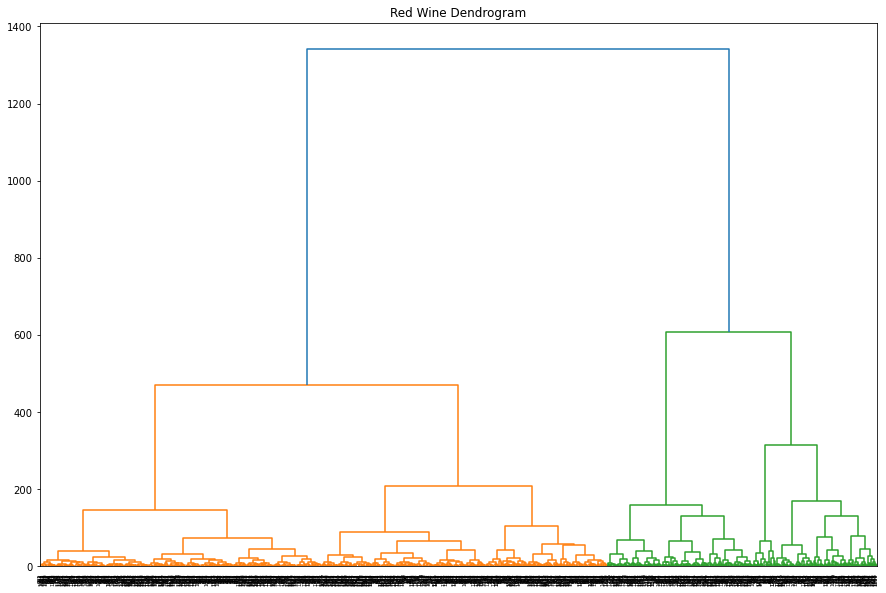

In [92]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15,10))
plt.title('Red Wine Dendrogram')
dend = shc.dendrogram(shc.linkage(x,method='ward'))

In [93]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(x)

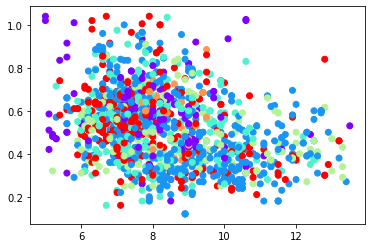

In [94]:
plt.scatter(x[:,0],x[:,1],c=model.labels_, cmap='rainbow')
plt.show()

# DBSCAN Clustering

In [95]:
X = new_data.drop('quality', axis=1)
Y = new_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [96]:
dbscan = DBSCAN(eps=0.3,min_samples=2)
dbscan.fit(x)

DBSCAN(eps=0.3, min_samples=2)

In [97]:
dbscan.labels_

array([  0,  -1,  -1, ..., 207,  -1,  -1], dtype=int64)

In [98]:
#help(dbscan)

In [99]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
dbscan.labels_

array([  0,  -1,  -1, ..., 207,  -1,  -1], dtype=int64)

# other analysis

In [100]:
# addition of a new column wine_quality --> bad or good
new_data['wine_quality'] = new_data['quality'].apply(lambda x:"good" if x>=7 else "bad")
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [101]:
wine_quality = new_data['wine_quality'].value_counts()
wine_quality

bad     1250
good     201
Name: wine_quality, dtype: int64

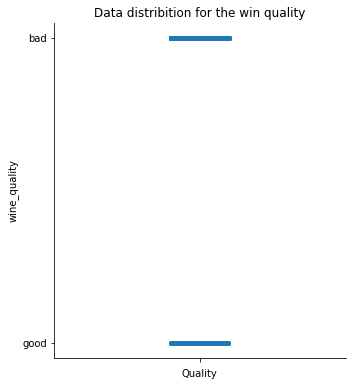

In [102]:
sns.catplot(new_data["wine_quality"])
plt.xlabel("Quality")
plt.title("Data distribition for the win quality")
#plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

In [103]:
good_prop = 201/(201+1250) * 100
good_prop

13.852515506547208

In [104]:
good_df = new_data[new_data["wine_quality"] == "good"]
good_df.shape

(201, 13)

<Axes: >

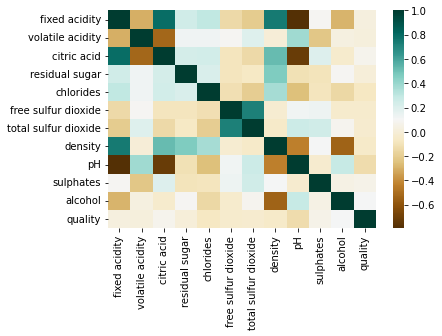

In [105]:
good = good_df.corr()
sns.heatmap(good, cmap="BrBG")

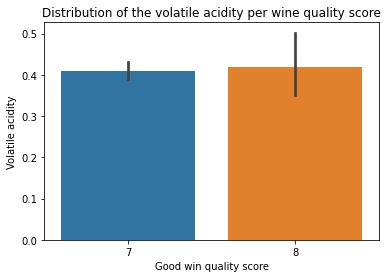

In [106]:
sns.barplot(data=good_df, x='quality', y='volatile acidity')
plt.xlabel("Good win quality score")
plt.ylabel("Volatile acidity")
plt.title("Distribution of the volatile acidity per wine quality score")
plt.show()

# logistic regression model

In [107]:
X = new_data.drop('quality', axis=1)
Y = new_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [108]:
# modeling
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

Generalized Linear Models

In [109]:
In [1]: import statsmodels.api as sm

In [2]: data = sm.datasets.scotland.load()

In [3]: data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
In [4]: gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())

In [5]: gamma_results = gamma_model.fit()

In [6]: print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Sun, 14 Jan 2024   Deviance:                     0.087389
Time:                        11:41:52   Pearson chi2:                   0.0860
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9800
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0178      0

In [110]:
import statsmodels.api as sm
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Sun, 14 Jan 2024   Deviance:                   1.5565e+05
Time:                        11:41:52   Pearson chi2:                 5.35e+20
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.227e+17   7.62

ROC curve ?

In [111]:
#stat1 = ols("sepal_area_sqrt ~ sepal_length + sepal_width + sepal_area + sepal_aspect_ratio + \
#sepal_petal_length_diff + sepal_petal_width_diff", data = iris_data).fit()
#print(stat1.summary())

# Multiple Linear Regression

In [146]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
  


# creating train and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# creating a regression model 
model = LinearRegression() 
  
# fitting the model 
model.fit(X_train, y_train) 
  
# making predictions 
predictions = model.predict(X_test) 
  
# model evaluation 
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [1279, 1199]

In [ ]:
X = wine_data.drop('quality', axis=1)
Y = wine_data['quality']